In [38]:
import os
import pandas as pd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
df = pd.read_csv('owid-covid-data.csv')
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-03-04,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [ ]:
## Take alook on our dataset

In [4]:
df.tail(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
237934,ZWE,Africa,Zimbabwe,2022-11-17,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
237935,ZWE,Africa,Zimbabwe,2022-11-18,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
237936,ZWE,Africa,Zimbabwe,2022-11-19,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
237937,ZWE,Africa,Zimbabwe,2022-11-20,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
237938,ZWE,Africa,Zimbabwe,2022-11-21,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
237939,ZWE,Africa,Zimbabwe,2022-11-22,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
237940,ZWE,Africa,Zimbabwe,2022-11-23,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
237941,ZWE,Africa,Zimbabwe,2022-11-24,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
237942,ZWE,Africa,Zimbabwe,2022-11-25,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
237943,ZWE,Africa,Zimbabwe,2022-11-26,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


### Data Exploration

In [ ]:
# Summarize Data

In [5]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.245440e+05,2.242300e+05,2.230310e+05,2.052120e+05,205137.000000,203953.000000,223520.000000,223206.000000,222012.000000,204201.000000,...,143190.000000,94379.000000,170646.000000,218598.000000,187051.000000,2.369200e+05,7.992000e+03,7992.000000,8043.000000,7992.000000
mean,4.689430e+06,1.220148e+04,1.223091e+04,7.576632e+04,134.279969,134.916935,63949.323418,186.515968,186.875082,707.401373,...,32.813511,50.902810,3.088438,73.613477,0.724716,1.411640e+08,4.924899e+04,10.005140,14.243364,1385.481332
std,2.918466e+07,8.419253e+04,8.221108e+04,3.885170e+05,717.207132,702.860170,111864.076136,1157.987838,689.109981,990.525199,...,13.536115,31.876024,2.551703,7.447102,0.149602,6.933225e+08,1.356468e+05,13.417596,26.132743,1760.448636
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-28.450000,-95.920000,-1984.281517
25%,4.826750e+03,0.000000e+00,5.571000e+00,1.160000e+02,0.000000,0.000000,1150.835750,0.000000,1.207000,31.026000,...,21.600000,20.859000,1.300000,69.500000,0.602000,8.960070e+05,4.645000e+01,0.660000,0.000000,33.653485
50%,5.363500e+04,4.900000e+01,8.900000e+01,1.238000e+03,1.000000,1.429000,11150.956500,6.609000,18.188000,223.218000,...,33.100000,49.839000,2.500000,75.050000,0.742000,6.948395e+06,6.272600e+03,7.580000,7.400000,838.494043
75%,5.546040e+05,9.197500e+02,1.091714e+03,1.019100e+04,13.000000,15.000000,76509.236000,93.043250,131.705750,1049.310000,...,41.300000,83.241000,4.200000,79.070000,0.838000,3.369661e+07,3.598455e+04,15.580000,19.505000,2183.342461
max,6.412137e+08,4.081970e+06,3.436038e+06,6.630089e+06,17733.000000,14859.143000,685527.010000,228872.025000,36421.827000,6383.425000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.240683e+06,76.550000,376.580000,10032.844512


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237944 entries, 0 to 237943
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    237944 non-null  object 
 1   continent                                   224530 non-null  object 
 2   location                                    237944 non-null  object 
 3   date                                        237944 non-null  object 
 4   total_cases                                 224544 non-null  float64
 5   new_cases                                   224230 non-null  float64
 6   new_cases_smoothed                          223031 non-null  float64
 7   total_deaths                                205212 non-null  float64
 8   new_deaths                                  205137 non-null  float64
 9   new_deaths_smoothed                         203953 non-null  float64
 

### Droping the Dublicates Rows

In [7]:
df.shape

(237944, 67)

In [8]:
duplicate_rows_df = df[df.duplicated()]

print("Number of duplicate rows:", duplicate_rows_df.shape)

Number of duplicate rows: (0, 67)


In [9]:
df.count() #Used to count the number of rows

iso_code                                   237944
continent                                  224530
location                                   237944
date                                       237944
total_cases                                224544
                                            ...  
population                                 236920
excess_mortality_cumulative_absolute         7992
excess_mortality_cumulative                  7992
excess_mortality                             8043
excess_mortality_cumulative_per_million      7992
Length: 67, dtype: int64

In [ ]:
#df = df.drop_duplicates()

#df.head()

In [ ]:
#df.count()

### Checking the Misiing or Null values

In [10]:
print(df.isnull().sum())

iso_code                                        0
continent                                   13414
location                                        0
date                                            0
total_cases                                 13400
                                            ...  
population                                   1024
excess_mortality_cumulative_absolute       229952
excess_mortality_cumulative                229952
excess_mortality                           229901
excess_mortality_cumulative_per_million    229952
Length: 67, dtype: int64


In [ ]:
# if we find miss values then remove its by using following steps

# df = df.dropna() #Droping the missing values

# df.count()

In [ ]:
#print(df.isnull().sum()) #After dropping the values

In [12]:
df1 = df[['date', 'total_cases', 'new_cases', 'total_deaths', 'new_tests', 'total_tests']]
df1.head()

,date,total_cases,new_cases,total_deaths,new_tests,total_tests
0,2020-02-24,5.0,5.0,NaN,NaN,NaN
1,2020-02-25,5.0,0.0,NaN,NaN,NaN
2,2020-02-26,5.0,0.0,NaN,NaN,NaN
3,2020-02-27,5.0,0.0,NaN,NaN,NaN
4,2020-02-28,5.0,0.0,NaN,NaN,NaN


In [13]:
df1.date = pd.to_datetime(df.date)

df1.set_index('date', inplace = True)

C:\Users\Omar EL-Saied\AppData\Local\Temp\ipykernel_2060\787721287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.date = pd.to_datetime(df.date)


In [45]:
df1.head()

,total_cases,new_cases,total_deaths,new_tests,total_tests
date,,,,,
2020-02-24,5.0,5.0,NaN,NaN,NaN
2020-02-25,5.0,0.0,NaN,NaN,NaN
2020-02-26,5.0,0.0,NaN,NaN,NaN
2020-02-27,5.0,0.0,NaN,NaN,NaN
2020-02-28,5.0,0.0,NaN,NaN,NaN


In [46]:
df1.tail()

,total_cases,new_cases,total_deaths,new_tests,total_tests
date,,,,,
2022-11-22,257893.0,0.0,5606.0,NaN,NaN
2022-11-23,257893.0,0.0,5606.0,NaN,NaN
2022-11-24,257893.0,0.0,5606.0,NaN,NaN
2022-11-25,257893.0,0.0,5606.0,NaN,NaN
2022-11-26,257893.0,0.0,5606.0,NaN,NaN


Text(0.5, 0, 'Month')

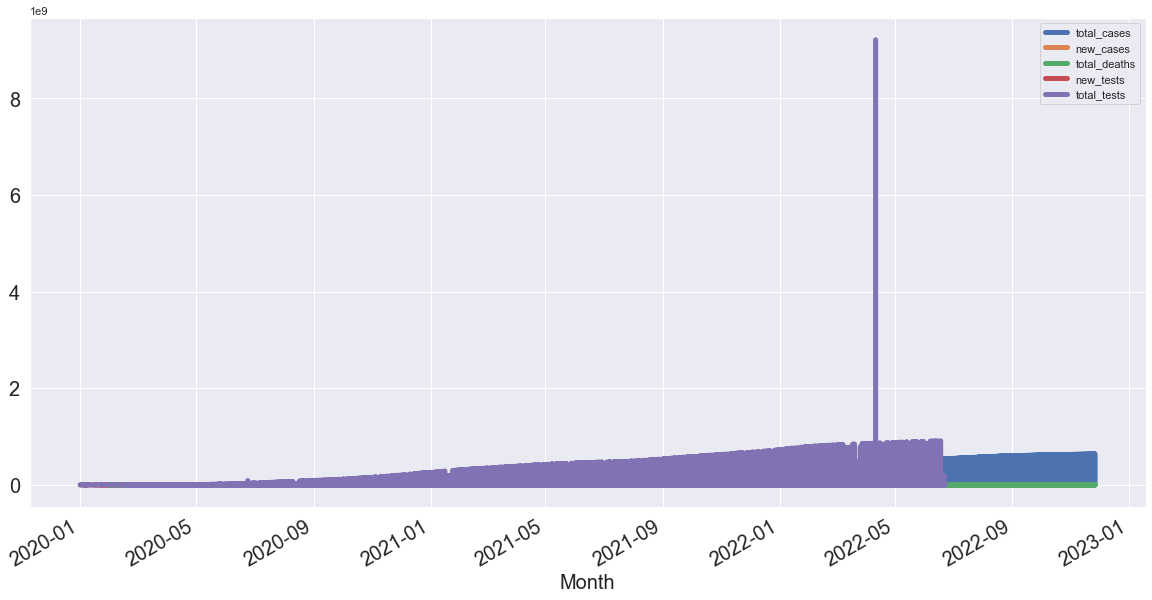

In [26]:
df1.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

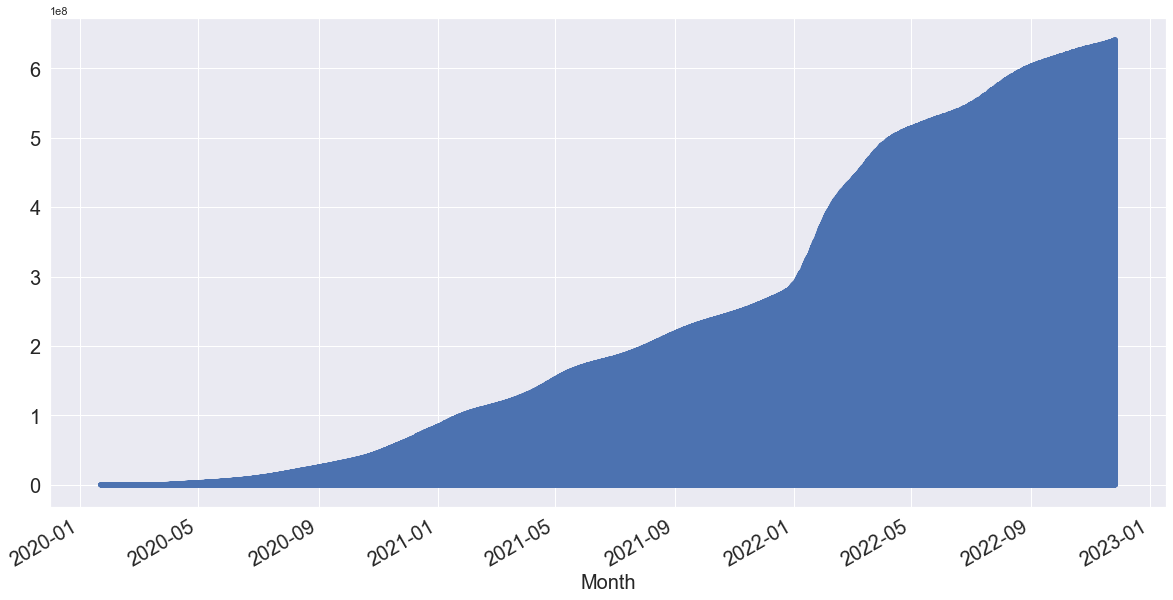

In [25]:
df1.total_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

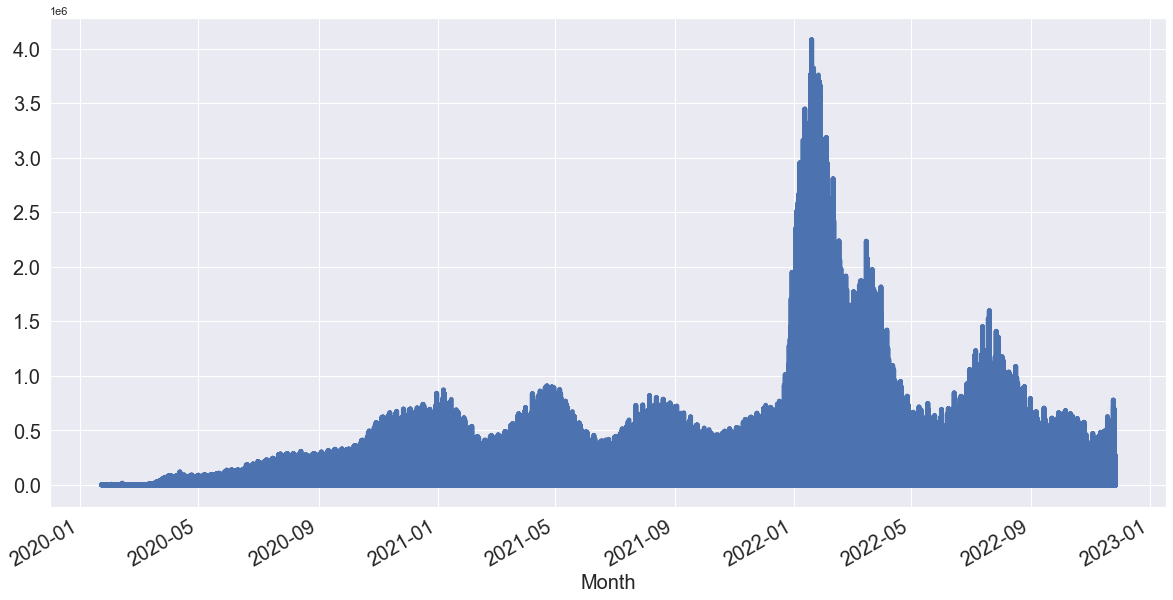

In [24]:
df1.new_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

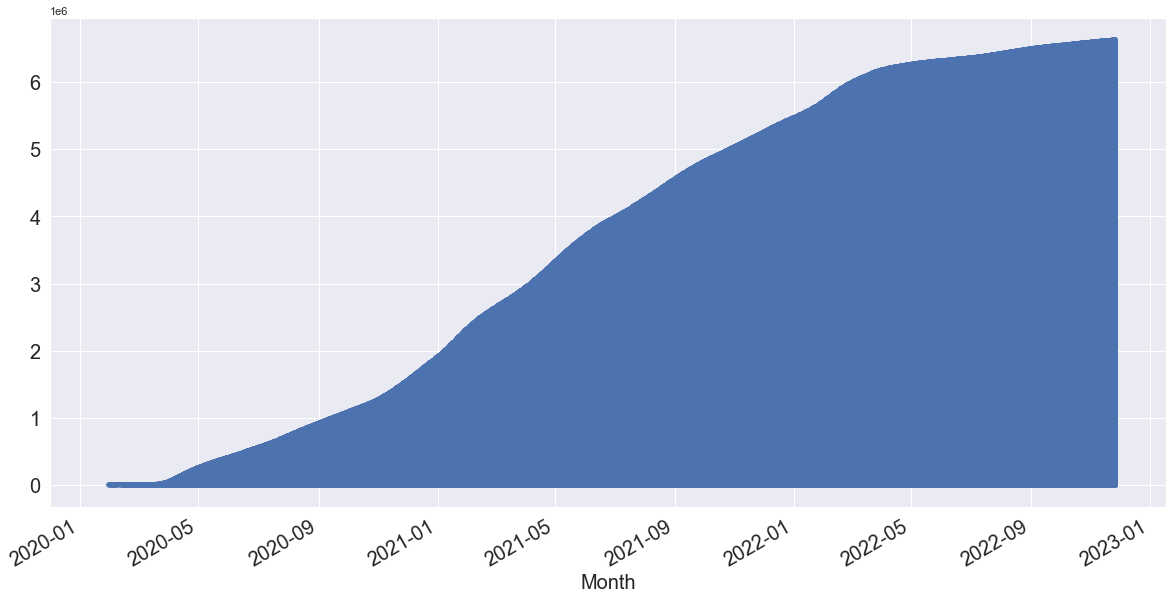

In [27]:
df1.total_deaths.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

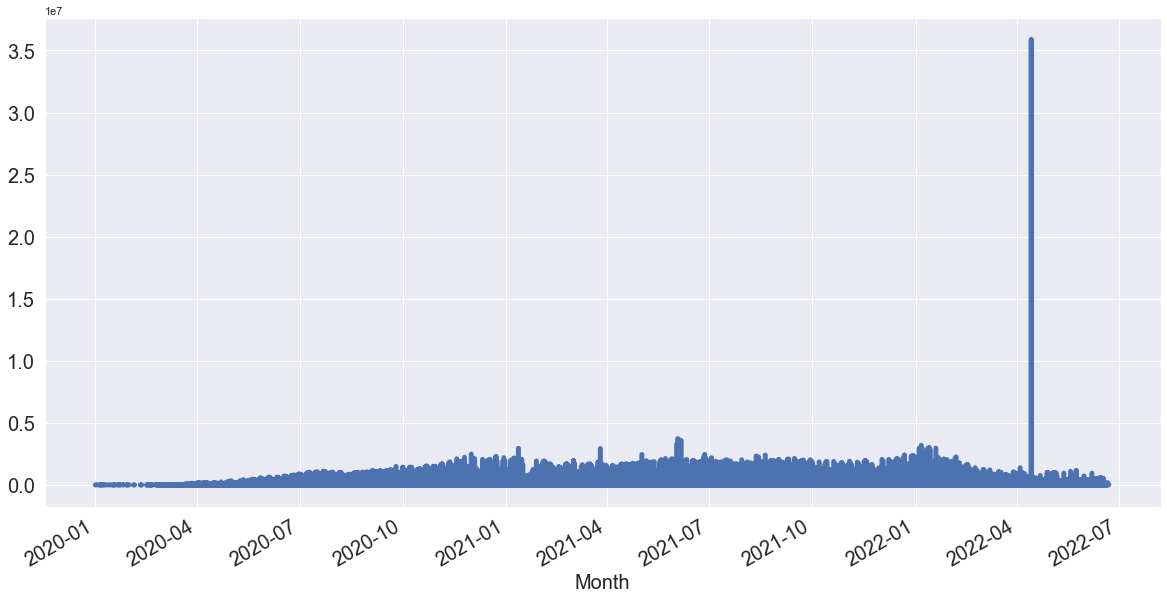

In [28]:
df1.new_tests.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

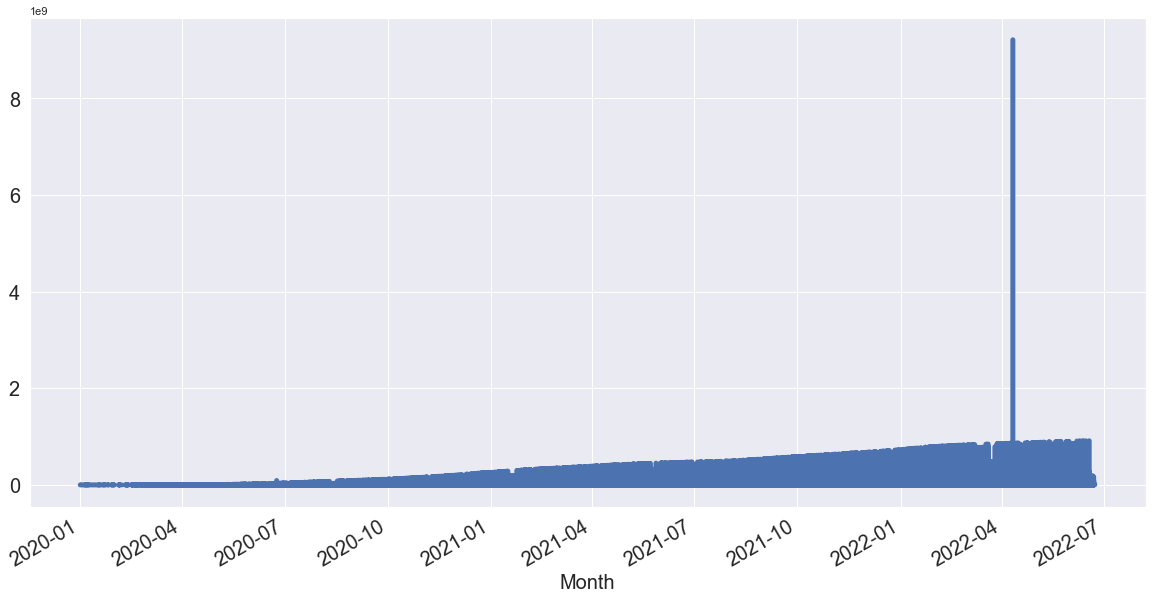

In [29]:
df1.total_tests.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

### Trends and Seasonality in TimeSeries Data

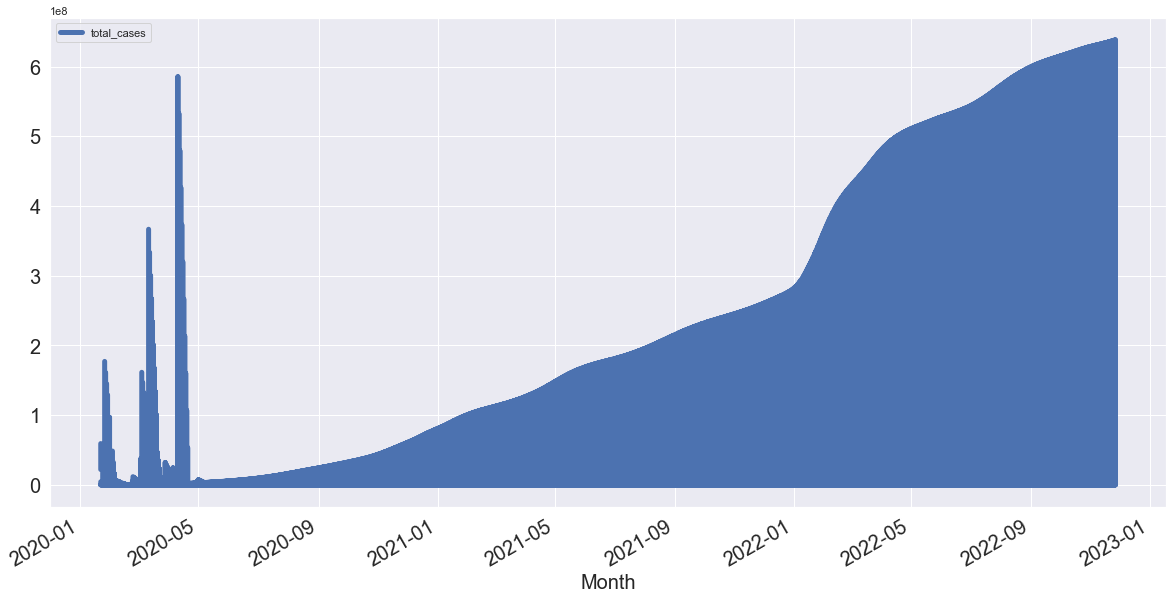

In [30]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

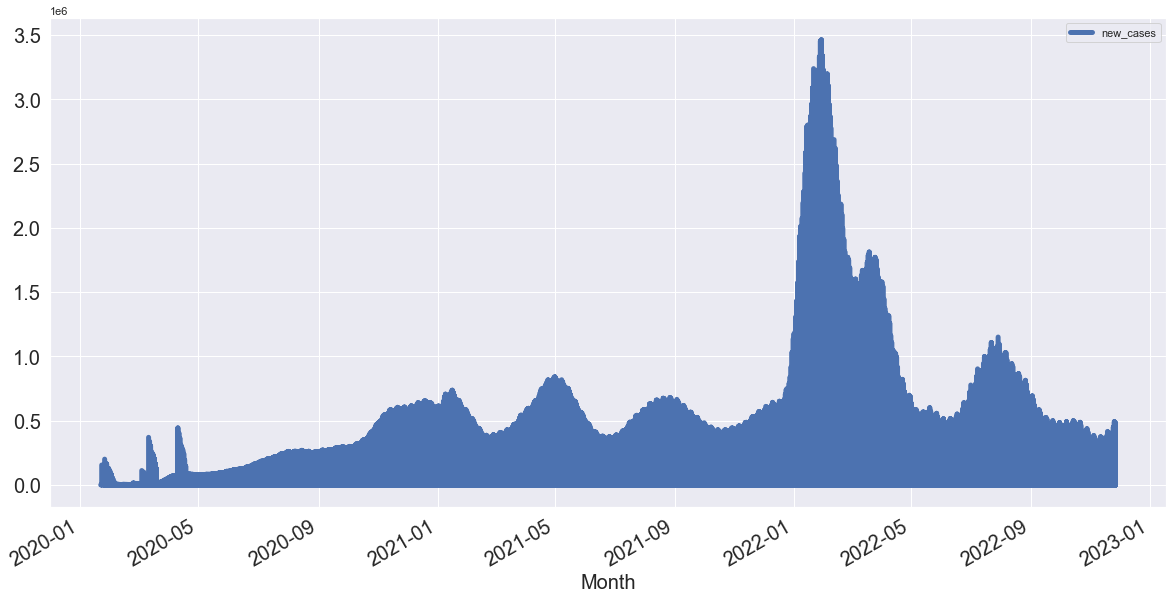

In [31]:
total_cases = df1[['new_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

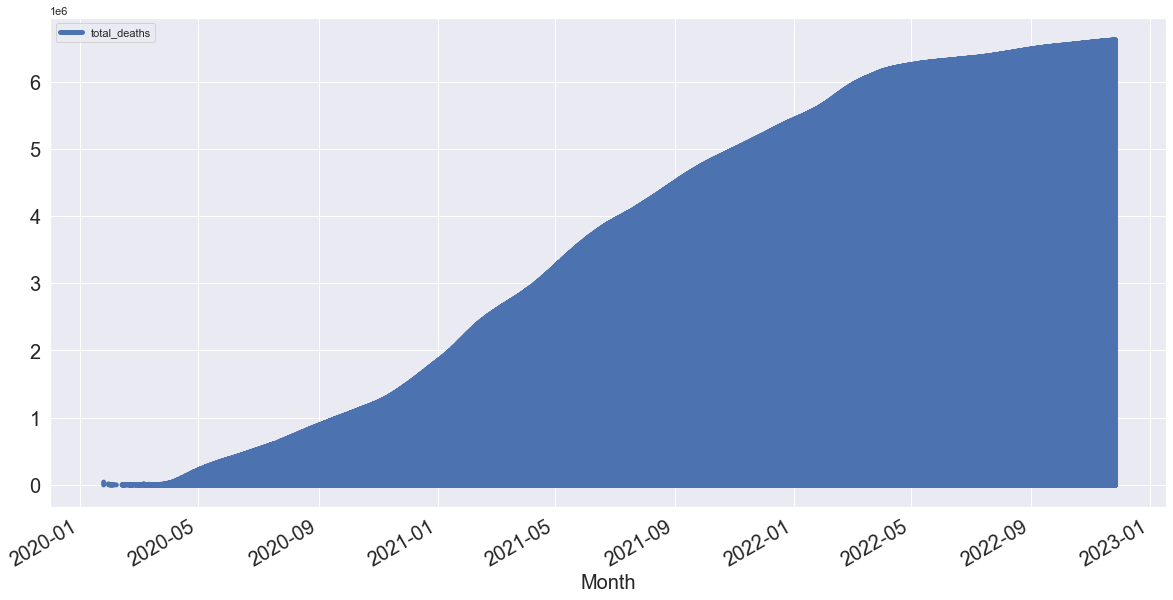

In [32]:
total_cases = df1[['total_deaths']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

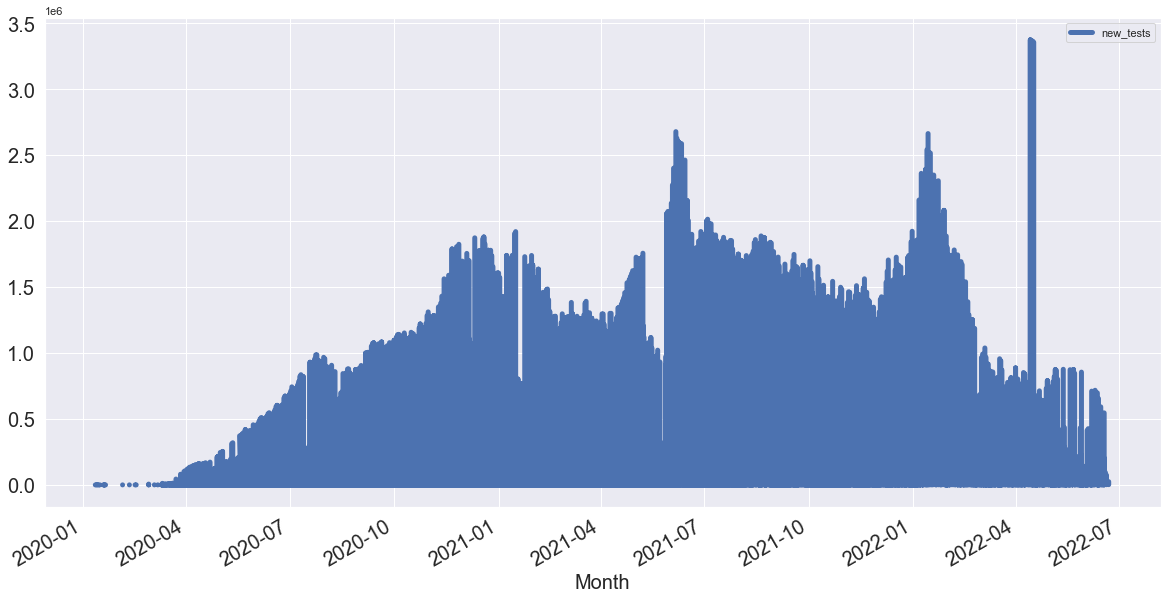

In [33]:
total_cases = df1[['new_tests']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

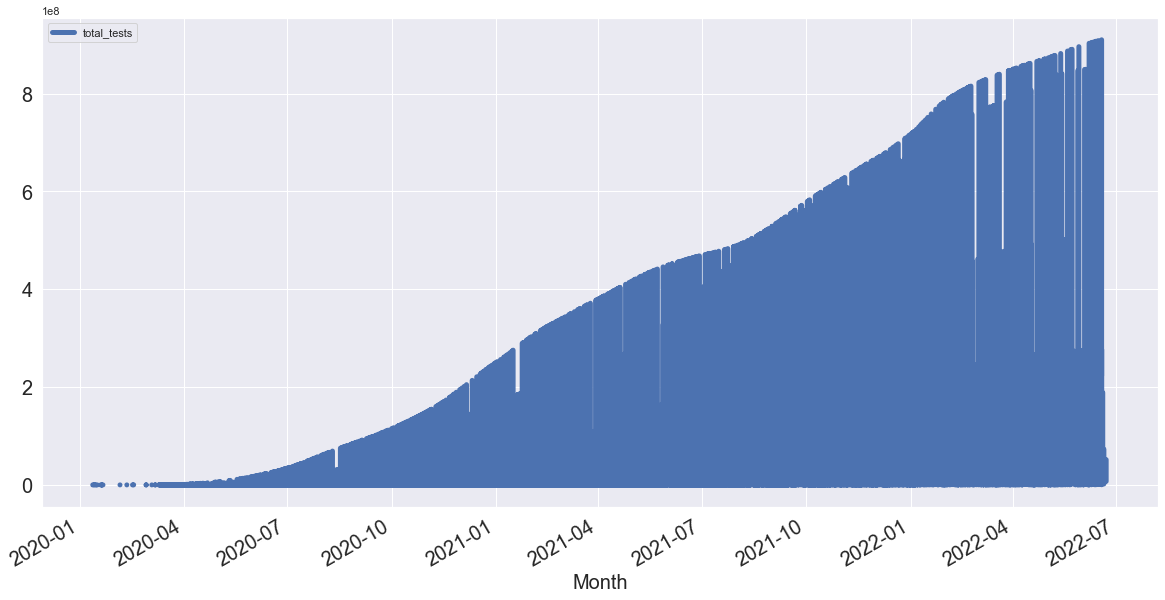

In [34]:
total_cases = df1[['total_tests']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

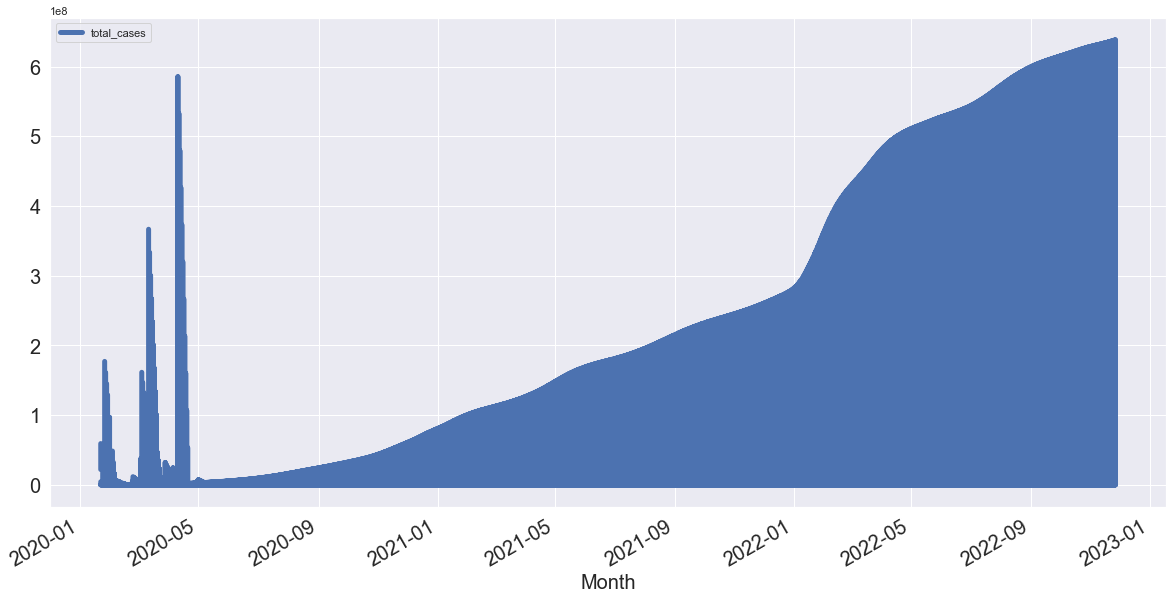

In [35]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

In [ ]:
# That Code given me error and i don't know why ?!

In [49]:
#df_rm = pd.concat([total_cases.rolling(12).mean(), total_deaths.rolling(12).mean(), axis=1])
#df_rm.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
#plt.xlabel('Month' , fontsize = 20);

### Seasonal Patterns in Time Series Data

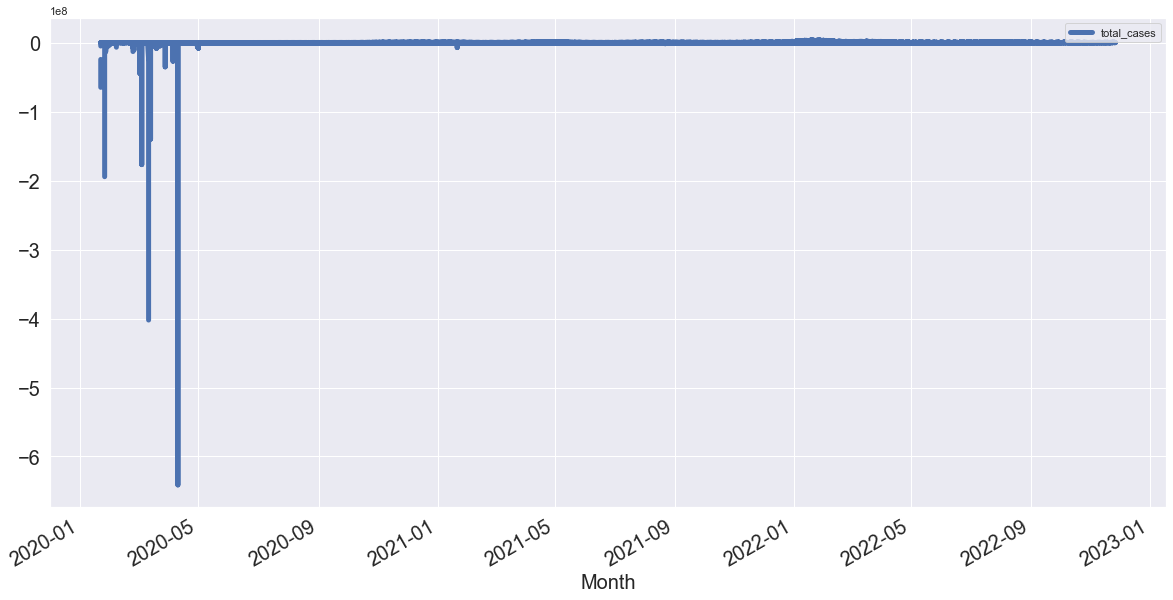

In [51]:
total_cases.diff().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20);

# Thanks A lot